In [293]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

In [294]:
# Y - LABELS
y = pd.read_csv('D:/Projects/IDEA-FRM/ML_InputData/Inundation.csv')
y.drop_duplicates(['x','y'])
#No duplicates

,ID,Inundation,x,y,yr
0,1,0.0,89.904230,25.944062,2018
1,2,0.0,90.031077,26.070348,2018
2,3,0.0,90.182180,26.338457,2018
3,4,0.0,89.958831,26.041744,2018
4,5,0.0,90.420653,26.289320,2018
...,...,...,...,...,...
313955,78486,0.0,91.375418,26.765068,2021
313956,78487,0.0,91.423874,26.737816,2021
313957,78488,0.0,91.257050,26.703543,2021
313958,78489,0.0,90.908381,26.623396,2021


In [295]:
input_df = pd.read_csv('D:/Projects/IDEA-FRM/ML_InputData/mltrainingdataset.csv')
input_df.tail()

,ID,ndbi,yr,gmted_drainage_density_without_1,srtm_filled_dem,GCN250_ARCIII_average,assam_lith,land use,assam_dist_from_major_rivers_updated_3857,ndvi,assam_soil,sum,strm_filled_slope_degrees
313955,78486,0.616145,2021,0.000282,127.722221,90.0,6.0,2.0,47941.921875,0.687854,56.0,1255.143921,89.991646
313956,78487,0.502872,2021,0.000367,115.111115,88.0,6.0,3.0,53591.566406,0.796253,56.0,1255.143921,89.979866
313957,78488,0.674456,2021,0.000599,62.833332,90.0,6.0,2.0,36051.488281,0.632692,56.0,1675.558594,89.978165
313958,78489,0.411129,2021,0.000570,55.388889,91.0,3.0,1.0,3185.425537,0.410445,56.0,1677.146729,89.984558
313959,78490,0.499754,2021,0.000501,83.472221,NaN,3.0,5.0,4815.632324,0.815661,56.0,1984.707275,89.994942


In [296]:
input_df.isnull().sum()

ID                                               0
ndbi                                           971
yr                                               0
gmted_drainage_density_without_1                 0
srtm_filled_dem                                  0
GCN250_ARCIII_average                        14538
assam_lith                                     354
land use                                        16
assam_dist_from_major_rivers_updated_3857        0
ndvi                                           971
assam_soil                                    3248
sum                                              0
strm_filled_slope_degrees                        0
dtype: int64

In [297]:
input_df.assam_soil.value_counts()

56.0     146637
255.0    103430
230.0     33601
254.0     27044
Name: assam_soil, dtype: int64

In [298]:
input_df['land use'].value_counts()

2.0    236376
3.0     35957
5.0     14860
1.0     14162
4.0     12589
Name: land use, dtype: int64

In [299]:
#Convert categorical variables using dictionary.

lu_dict = {1: "water",
           2: "vegetation",
           3: "built",
           4: "range land",
           5: "bare ground"}

soil_dict = {56: "clay, loamy clay, sandy clay, silty clay",
            254: "rocky, other non-soil categories",
            255: "loamy sand, sand",
            230:"loam, silt loam, silt, sandy loam"}

lith_dict = {1:"water",
             2:"metamorphic, mesozoic and paleozoic intusive",
             3:"neogene sedimentary rock",
             4:"undeveloped precambrian rock",
             5:"paleogene sedementary rock",
             6:"paleozoic rock",
             7:"quaternary sediments",
             8:"tertiary sedimentary rocks"}

input_df = input_df.replace({"assam_soil": soil_dict,
                             "assam_lith":lith_dict,
                            "land use":lu_dict})

# TABLE OF CONTENTS
1. [Data pre-processing](#datapreprocess)
2. [Multicollinearity Analysis](#multicollinear)
3. [Dimensionality Reduction](#dimreduce)

### Appendix:
1. [Dataset preparation](#dataprep)

## Data pre-processing <a class="anchor" id="datapreprocess"></a>
1. One-Hot Encoding of categorical variables
2. Test-Train Split
3. NAN Imputation using MissForest Method (RF)
4. Normalise Data

In [300]:
#ONEHOT ENCODING
one_hot_encoded_data = pd.get_dummies(input_df, columns = ['assam_soil', 'assam_lith','land use'],
                                     dummy_na=True)

In [301]:
one_hot_encoded_data.columns

Index(['ID', 'ndbi', 'yr', 'gmted_drainage_density_without_1',
       'srtm_filled_dem', 'GCN250_ARCIII_average',
       'assam_dist_from_major_rivers_updated_3857', 'ndvi', 'sum',
       'strm_filled_slope_degrees',
       'assam_soil_clay, loamy clay, sandy clay, silty clay',
       'assam_soil_loam, silt loam, silt, sandy loam',
       'assam_soil_loamy sand, sand',
       'assam_soil_rocky, other non-soil categories', 'assam_soil_nan',
       'assam_lith_metamorphic, mesozoic and paleozoic intusive',
       'assam_lith_neogene sedimentary rock',
       'assam_lith_paleogene sedementary rock', 'assam_lith_paleozoic rock',
       'assam_lith_quaternary sediments',
       'assam_lith_tertiary sedimentary rocks',
       'assam_lith_undeveloped precambrian rock', 'assam_lith_water',
       'assam_lith_nan', 'land use_bare ground', 'land use_built',
       'land use_range land', 'land use_vegetation', 'land use_water',
       'land use_nan'],
      dtype='object')

In [302]:
#Ensuring OHE data represents Null values. 
one_hot_encoded_data.loc[one_hot_encoded_data.assam_soil_nan == 1,
                         
                         ["assam_soil_clay, loamy clay, sandy clay, silty clay",
                          "assam_soil_loamy sand, sand",
                         "assam_soil_rocky, other non-soil categories",
                         "assam_soil_loam, silt loam, silt, sandy loam"]
                         
                        ] = np.nan

del one_hot_encoded_data["assam_soil_nan"]


one_hot_encoded_data.loc[one_hot_encoded_data.assam_lith_nan == 1,
                         
                         ["assam_lith_metamorphic, mesozoic and paleozoic intusive",
                          "assam_lith_neogene sedimentary rock",
                          "assam_lith_paleogene sedementary rock",
                          "assam_lith_paleozoic rock",
                          "assam_lith_undeveloped precambrian rock",
                          "assam_lith_quaternary sediments",
                          "assam_lith_tertiary sedimentary rocks",
                          "assam_lith_water"
                         ]
                         
                        ] = np.nan

del one_hot_encoded_data["assam_lith_nan"]

one_hot_encoded_data.loc[one_hot_encoded_data['land use_nan'] == 1,
                         
                         ["land use_bare ground",
                          "land use_built",
                          "land use_range land",
                          "land use_vegetation",
                          "land use_water"
                         ]
                         
                        ] = np.nan
del one_hot_encoded_data["land use_nan"]

In [303]:
one_hot_encoded_data.tail()

,ID,ndbi,yr,gmted_drainage_density_without_1,srtm_filled_dem,GCN250_ARCIII_average,assam_dist_from_major_rivers_updated_3857,ndvi,sum,strm_filled_slope_degrees,...,assam_lith_paleozoic rock,assam_lith_quaternary sediments,assam_lith_tertiary sedimentary rocks,assam_lith_undeveloped precambrian rock,assam_lith_water,land use_bare ground,land use_built,land use_range land,land use_vegetation,land use_water
313955,78486,0.616145,2021,0.000282,127.722221,90.0,47941.921875,0.687854,1255.143921,89.991646,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
313956,78487,0.502872,2021,0.000367,115.111115,88.0,53591.566406,0.796253,1255.143921,89.979866,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
313957,78488,0.674456,2021,0.000599,62.833332,90.0,36051.488281,0.632692,1675.558594,89.978165,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
313958,78489,0.411129,2021,0.000570,55.388889,91.0,3185.425537,0.410445,1677.146729,89.984558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
313959,78490,0.499754,2021,0.000501,83.472221,NaN,4815.632324,0.815661,1984.707275,89.994942,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [304]:
one_hot_encoded_data.isnull().sum()

ID                                                             0
ndbi                                                         971
yr                                                             0
gmted_drainage_density_without_1                               0
srtm_filled_dem                                                0
GCN250_ARCIII_average                                      14538
assam_dist_from_major_rivers_updated_3857                      0
ndvi                                                         971
sum                                                            0
strm_filled_slope_degrees                                      0
assam_soil_clay, loamy clay, sandy clay, silty clay         3248
assam_soil_loam, silt loam, silt, sandy loam                3248
assam_soil_loamy sand, sand                                 3248
assam_soil_rocky, other non-soil categories                 3248
assam_lith_metamorphic, mesozoic and paleozoic intusive      354
assam_lith_neogene sedime

In [317]:
# TEST-TRAIN SPLIT
from sklearn.model_selection import train_test_split
X = one_hot_encoded_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [319]:
import numpy as np
import random
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

imputer = MissForest(random_state=1337) #miss forest
X_imputed = imputer.fit_transform(X_train,cat_vars=np.array(range(10,27,1)))
X_imputed = pd.DataFrame(X_imputed, columns = X_train.columns)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8


In [320]:
X_imputed.isnull().sum()

ID                                                         0
ndbi                                                       0
yr                                                         0
gmted_drainage_density_without_1                           0
srtm_filled_dem                                            0
GCN250_ARCIII_average                                      0
assam_dist_from_major_rivers_updated_3857                  0
ndvi                                                       0
sum                                                        0
strm_filled_slope_degrees                                  0
assam_soil_clay, loamy clay, sandy clay, silty clay        0
assam_soil_loam, silt loam, silt, sandy loam               0
assam_soil_loamy sand, sand                                0
assam_soil_rocky, other non-soil categories                0
assam_lith_metamorphic, mesozoic and paleozoic intusive    0
assam_lith_neogene sedimentary rock                        0
assam_lith_paleogene sed

In [321]:
X_imputed.to_csv('D:/Projects/IDEA-FRM/ML_InputData/mltrainingdataset_MissForestImputed.csv',index=False)

In [322]:
# NORMALISE DATA
from sklearn.preprocessing import StandardScaler
cat_columns = np.array(range(10,27,1))
X_train_cat = X_imputed.iloc[:,10:]
X_train_con = X_imputed.iloc[:,:10]
X_train_con = X_train_con.drop(['ID','yr'],axis=1)

standardized_data = StandardScaler().fit_transform(X_train_con)

X_train_con = pd.DataFrame(standardized_data,columns=X_train_con.columns)
X_train = pd.concat([X_train_con,X_train_cat.reset_index(drop=True)],axis=1)
X_train

,ndbi,gmted_drainage_density_without_1,srtm_filled_dem,GCN250_ARCIII_average,assam_dist_from_major_rivers_updated_3857,ndvi,sum,strm_filled_slope_degrees,"assam_soil_clay, loamy clay, sandy clay, silty clay","assam_soil_loam, silt loam, silt, sandy loam",...,assam_lith_paleozoic rock,assam_lith_quaternary sediments,assam_lith_tertiary sedimentary rocks,assam_lith_undeveloped precambrian rock,assam_lith_water,land use_bare ground,land use_built,land use_range land,land use_vegetation,land use_water
0,1.813821,1.142837,-0.158885,1.130065,-0.771594,-1.451468,1.074697,0.170349,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.300583,1.005801,-0.583896,-0.057079,-0.787886,-1.126326,-0.137715,0.166721,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.150243,0.880381,-0.583759,-0.479549,-0.942523,-0.189455,1.654567,0.169090,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.223129,1.340356,-0.337067,-0.479549,1.122591,0.252395,-1.106608,0.169089,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.628061,1.155988,-0.531932,-0.479549,-0.577880,0.621989,-0.439612,0.169325,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210348,-1.383000,-0.257239,-0.204559,-1.746962,-1.160090,1.237165,-1.219770,0.170349,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210349,-0.243232,0.143885,-0.334195,0.787863,1.278316,0.944564,0.689995,0.168296,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210350,0.017941,1.200740,-0.316008,0.787863,0.441384,0.443913,-0.187382,0.170149,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210351,-0.875774,-1.463153,-0.424995,-0.902020,-0.863719,0.661070,-1.160573,0.170922,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Multi-collinearity analysis: <a class="anchor" id="multicollinear"></a>
1. Scatter plots
2. Correlation Matrix
3. VIF

In [335]:
input_df = pd.read_csv('D:/Projects/IDEA-FRM/ML_InputData/mltrainingdataset_MissForestImputed.csv')
cat_columns = np.array(range(10,27,1))
X_train_cat = input_df.iloc[:,10:]
X_train_con = input_df.iloc[:,:10]
X_train_con = X_train_con.drop(['ID','yr'],axis=1)

standardized_data = StandardScaler().fit_transform(X_train_con)
X_train_con = pd.DataFrame(standardized_data,columns=X_train_con.columns)

X_train = pd.concat([X_train_con,X_train_cat.reset_index(drop=True)],axis=1)
X_train.tail()

,ndbi,gmted_drainage_density_without_1,srtm_filled_dem,GCN250_ARCIII_average,assam_dist_from_major_rivers_updated_3857,ndvi,sum,strm_filled_slope_degrees,"assam_soil_clay, loamy clay, sandy clay, silty clay","assam_soil_loam, silt loam, silt, sandy loam",...,assam_lith_paleozoic rock,assam_lith_quaternary sediments,assam_lith_tertiary sedimentary rocks,assam_lith_undeveloped precambrian rock,assam_lith_water,land use_bare ground,land use_built,land use_range land,land use_vegetation,land use_water
210348,-1.383000,-0.257239,-0.204559,-1.746962,-1.160090,1.237165,-1.219770,0.170349,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210349,-0.243232,0.143885,-0.334195,0.787863,1.278316,0.944564,0.689995,0.168296,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210350,0.017941,1.200740,-0.316008,0.787863,0.441384,0.443913,-0.187382,0.170149,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210351,-0.875774,-1.463153,-0.424995,-0.902020,-0.863719,0.661070,-1.160573,0.170922,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210352,-1.716954,-0.395233,0.100935,-1.746962,-1.088036,1.302474,0.054446,0.170900,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [327]:
# SCATTER PLOTS WITH HUE

#Independent variables
columns = input_df.columns
columns 

for column in columns:    
    for columny in columns:
        if column!=columny:
            sns_plot = sns.scatterplot(data=input_df, x=column, y=columny, hue="Inundation").get_figure()
            sns_plot.savefig('ScatterPlots/'+column+'-XX-'+columny+".png")
            plt.clf()
            plt.cla()
            
    columns.remove(column)

In [ ]:
# VIF with categorical variables?
# GVIF?
# Can use chi-square test and Phi-correlation coefficient for checking correlation in categorical variables. (After onehot encoding)

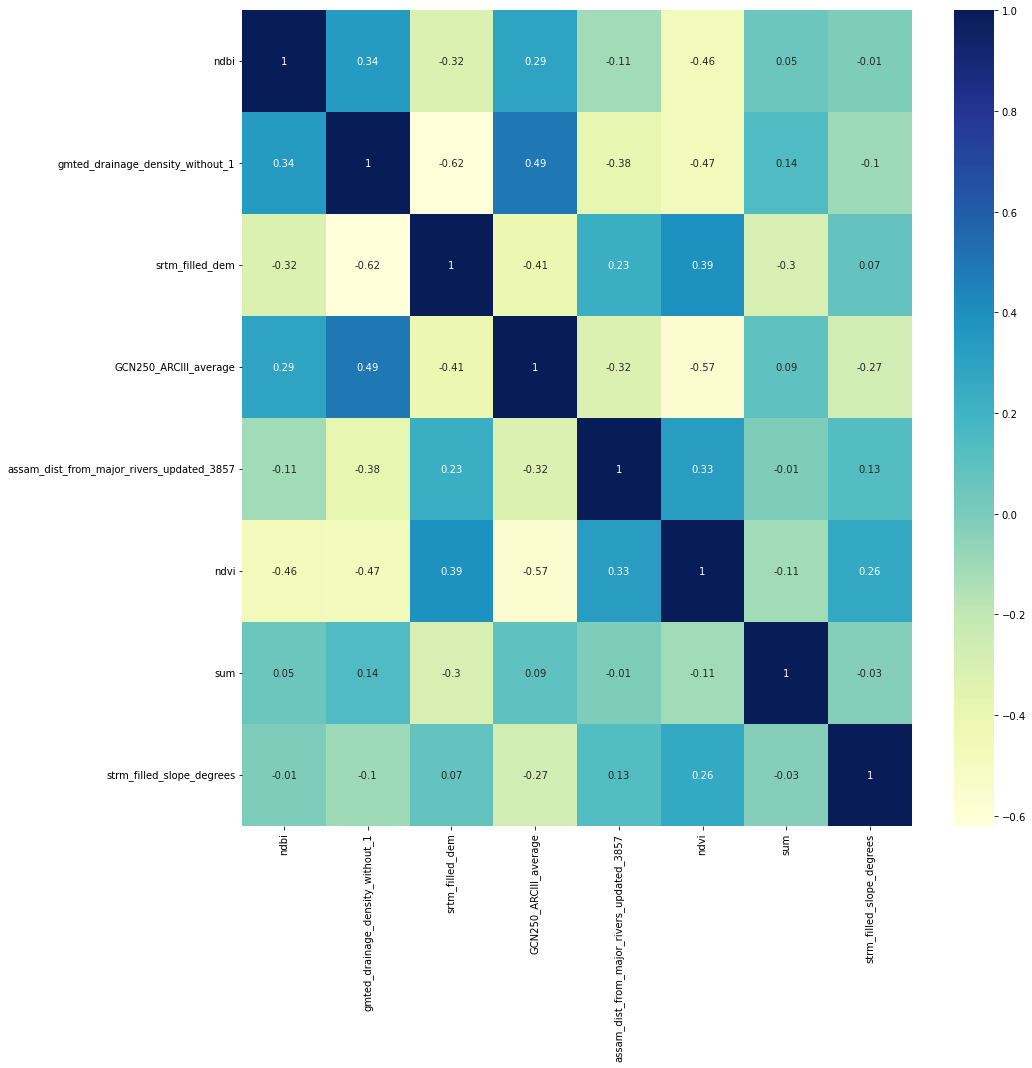

In [336]:
#CORRELATION MATRIX
rcParams['figure.figsize'] = 15,15

heatmap = sns.heatmap(X_train_con.corr().round(2),
        cmap="YlGnBu",
        annot=True).get_figure()

heatmap.savefig("CorrelationMatrix.png")

In [337]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
#X = input_df[columns]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_con.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_con.values, i)
                          for i in range(len(X_train_con.columns))]

In [338]:
vif_data

,feature,VIF
0,ndbi,1.355310
1,gmted_drainage_density_without_1,2.018288
2,srtm_filled_dem,1.847065
3,GCN250_ARCIII_average,1.716247
4,assam_dist_from_major_rivers_updated_3857,1.238617
5,ndvi,1.901209
6,sum,1.112460
7,strm_filled_slope_degrees,1.122592


# Dimensionality Reduction <a class="anchor" id="dimreduce"></a>
Data should be normalised before
1. PCA
2. t-SNE
3. PacMAP

In [342]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [345]:
finalDf = pd.concat([principalDf, y_train.reset_index(drop=True)], axis = 1)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

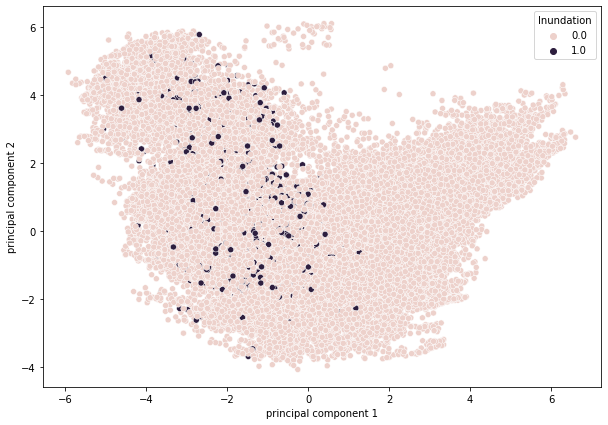

In [346]:
rcParams['figure.figsize'] = 10,7

sns.scatterplot(data=finalDf, x='principal component 1', y='principal component 2', hue="Inundation")

## Hue plot with years as well.

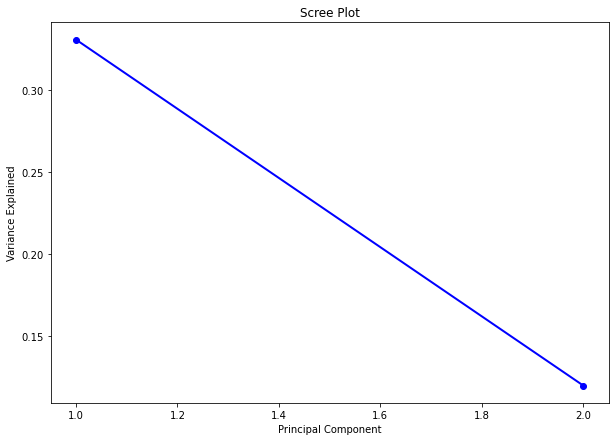

In [347]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [353]:
#t-SNE
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(X_train)
## perplexity parameter hyper tuning. 10-100. --- hyper tune based on t-SNE plots. 

In [354]:
tsne_data2 = np.vstack((tsne_data.T, y_train.Inundation)).T

C:\Users\saikr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


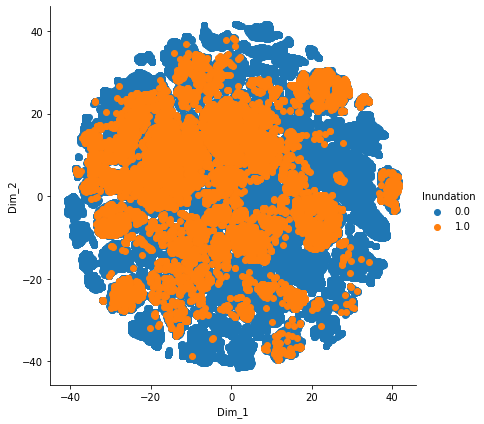

In [355]:
tsne_df = pd.DataFrame(data = tsne_data2,
     columns =("Dim_1", "Dim_2", "Inundation"))
 
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue ="Inundation", size = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

In [348]:
#PacMAP
import pacmap

In [349]:
PaCMP = pacmap.PaCMAP(2, None, 0.5, 2.0) 
#transformed = PaCMP.fit_transform(X_train)

In [350]:
transformed = PaCMP.fit_transform(X_train.values)

In [351]:
pacmap_data2 = np.vstack((transformed.T, y_train.Inundation)).T

C:\Users\saikr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


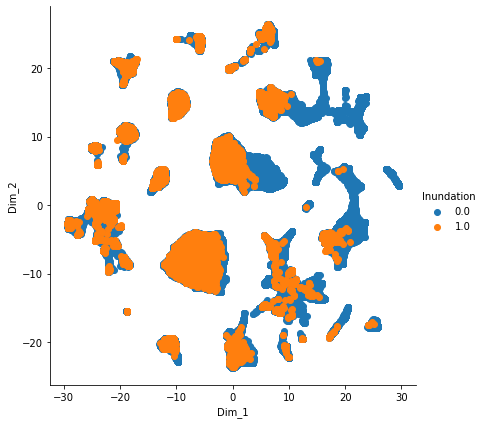

In [352]:
pacmap_df = pd.DataFrame(data = pacmap_data2,
     columns =("Dim_1", "Dim_2", "Inundation"))
 
# Ploting the result of tsne
sns.FacetGrid(pacmap_df, hue ="Inundation", size = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

### Dataset prep <a class="anchor" id="datapreprocess"></a>

In [275]:
import os
import glob

In [276]:
built_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_built_pts*")
drnDens_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_drnDens*")
elv_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_elv_pts*")
gcn_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_gcn_pts*")
lith_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_lith_pts_*")
lu_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_lu_pts_*")
slope_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_slope_pts_*")
rivdist_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_rivdist_pts_*")
veg_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_veg_pts_*")
soil_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_soil_pts_*")
rain_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_rain_pts_*")

inundation_pts_files = glob.glob(r"D:/Projects/IDEA-FRM/ML_InputData/ML_review/new_highfld*")

In [277]:
built_pts_dfs = []
for file in built_pts_files:
    built_pts_dfs.append(pd.read_csv(file))
    
drnDens_dfs = []
for file in drnDens_files:
    drnDens_dfs.append(pd.read_csv(file))

    
elv_pts_dfs = []
for file in elv_pts_files:
    elv_pts_dfs.append(pd.read_csv(file))

    
gcn_pts_dfs = []
for file in gcn_pts_files:
    gcn_pts_dfs.append(pd.read_csv(file))

lith_pts_dfs = []
for file in lith_pts_files:
    lith_pts_dfs.append(pd.read_csv(file))

lu_pts_dfs = []
for file in lu_pts_files:
    lu_pts_dfs.append(pd.read_csv(file))

slope_pts_dfs = []
for file in slope_pts_files:
    slope_pts_dfs.append(pd.read_csv(file))

rivdist_pts_dfs = []
for file in rivdist_pts_files:
    rivdist_pts_dfs.append(pd.read_csv(file))

veg_pts_dfs = []
for file in veg_pts_files:
    veg_pts_dfs.append(pd.read_csv(file))

soil_pts_dfs = []
for file in soil_pts_files:
    soil_pts_dfs.append(pd.read_csv(file))

rain_pts_dfs = []
for file in rain_pts_files:
    rain_pts_dfs.append(pd.read_csv(file))    

In [278]:
inundation_pts_dfs = []
for file in inundation_pts_files:
    inundation_pts_dfs.append(pd.read_csv(file))

In [279]:
built_pts_df = pd.concat(built_pts_dfs).drop(['x','y','Unnamed: 0'],axis=1)
drnDens_df = pd.concat(drnDens_dfs).drop(['x','y','Unnamed: 0'],axis=1)
elv_pts_df = pd.concat(elv_pts_dfs).drop(['x','y','Unnamed: 0'],axis=1)
gcn_pts_df = pd.concat(gcn_pts_dfs).drop(['x','y','Unnamed: 0'],axis=1)
lith_pts_df = pd.concat(lith_pts_dfs).drop(['x','y','Unnamed: 0'],axis=1)
lu_pts_df = pd.concat(lu_pts_dfs).drop(['x','y','Unnamed: 0'],axis=1)
slope_pts_df = pd.concat(slope_pts_dfs).drop(['x','y','Unnamed: 0'],axis=1)
rivdist_pts_df = pd.concat(rivdist_pts_dfs).drop(['x','y','Unnamed: 0'],axis=1)
veg_pts_df = pd.concat(veg_pts_dfs).drop(['x','y','Unnamed: 0'],axis=1)
soil_pts_df = pd.concat(soil_pts_dfs).drop(['x','y','Unnamed: 0'],axis=1)
rain_pts_df = pd.concat(rain_pts_dfs).drop(['x','y','Unnamed: 0'],axis=1)

In [280]:
inundation_pts_df = pd.concat(inundation_pts_dfs).drop(['Unnamed: 0'],axis=1)

In [286]:
MASTER = built_pts_df.merge(drnDens_df,on=['ID','yr']).merge(elv_pts_df,on=['ID','yr']).merge(gcn_pts_df,on=['ID','yr']).merge(lith_pts_df,on=['ID','yr']).merge(lu_pts_df,on=['ID','yr']).merge(rivdist_pts_df,on=['ID','yr']).merge(veg_pts_df,on=['ID','yr']).merge(soil_pts_df,on=['ID','yr']).merge(rain_pts_df,on=['ID','yr']).merge(slope_pts_df,on=['ID','yr'])

In [288]:
MASTER.shape

(313960, 13)

In [289]:
MASTER.to_csv('D:/Projects/IDEA-FRM/ML_InputData/mltrainingdataset.csv',index=False)

In [292]:
inundation_pts_df.to_csv('D:/Projects/IDEA-FRM/ML_InputData/Inundation.csv',index=False)